In [1]:
import numpy as np
import matplotlib.pyplot as plt

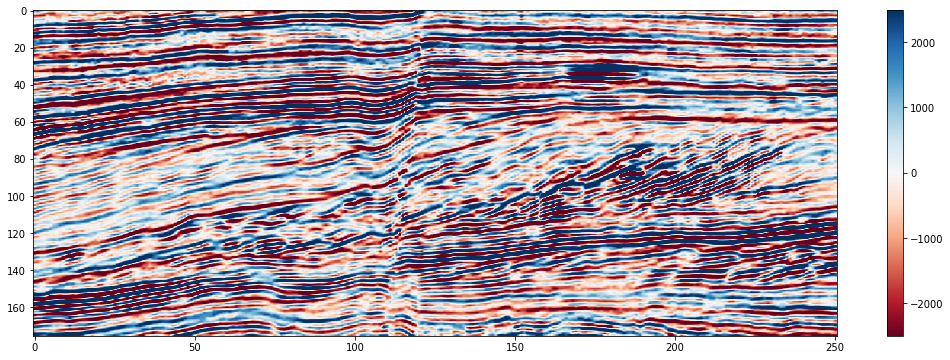

(251, 176)

In [2]:
data = np.load('/content/f3_seismic_inline.npy')
track = np.ravel(data)

plt.figure(figsize=(18,6))
plt.imshow(data.T, cmap="RdBu", vmin=-2500, vmax=2500, aspect='auto')
plt.colorbar()
plt.show()
data.shape

In [3]:
track_time= (2*60)+56
track_hecto_seconds = 251/track_time
track_hecto_seconds

1.4261363636363635

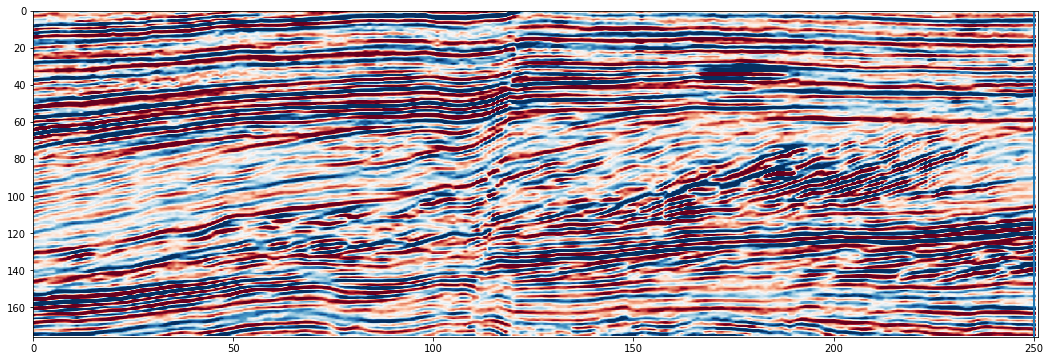

In [4]:
from matplotlib import animation
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(18,6))
ax = plt.axes(xlim=(0, data.shape[0]), ylim=(data.shape[1],0))
line, = ax.plot([], [], lw=2)
ax.imshow(data.T, cmap="RdBu", vmin=-2500, vmax=2500, aspect='auto')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = i
    y = np.arange(data.shape[0])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=1, blit=True)

anim.save('the_seismic.mp4', fps=track_hecto_seconds, extra_args=['-vcodec', 'libx264'])

In [5]:
seis_sr = 250
audio_sr = 44100
conv = seis_sr/audio_sr
a = track
rs_track = np.interp(np.arange(0, len(a), conv), np.arange(0, len(a)), a)

In [6]:
import numpy as np
from scipy.signal import butter,filtfilt
"""
Thank you, Neha Jirafe for sharing this code on medium 
https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7
"""
# Filter requirements.
T = 176        # Sample Period
fs = 44100     # sample rate, Hz
cutoff = 500      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

lpf_rs_track = butter_lowpass_filter(rs_track, cutoff, fs, order)

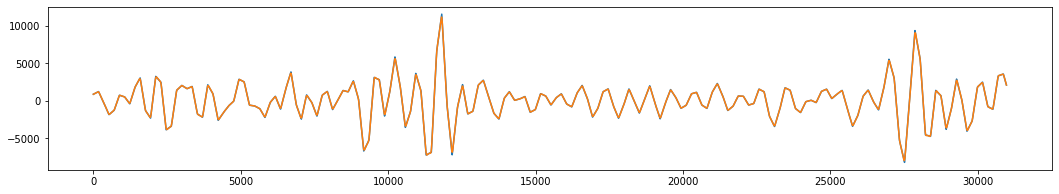

In [7]:
fig = plt.figure(figsize=(18,3))
plt.plot(rs_track[:176*176])
plt.plot(lpf_rs_track[:176*176])

In [8]:
!pip install pydub
import pydub
def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="128k")

write('/content/the_sound_of_seismic.mp3', 44100, lpf_rs_track)

In [9]:
import moviepy.editor as mp

audio = mp.AudioFileClip("/content/the_sound_of_seismic.mp3")
video1 = mp.VideoFileClip("/content/the_seismic.mp4")
final = video1.set_audio(audio)
print(audio.duration,video1.duration)
final.write_videofile("the_sound_of_seismic.mp4")

176.74 176.0
[MoviePy] >>>> Building video the_sound_of_seismic.mp4
[MoviePy] Writing audio in the_sound_of_seismicTEMP_MPY_wvf_snd.mp3


100%|██████████| 3898/3898 [00:04<00:00, 819.45it/s]

[MoviePy] Done.
[MoviePy] Writing video the_sound_of_seismic.mp4



100%|██████████| 252/252 [00:07<00:00, 31.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: the_sound_of_seismic.mp4 



**Seismic track exported. Next import bars of audio and convert to seismic**

**Part 2: Import wav and plot as seismic**

In [15]:
!pip install wavio
import wavio 

def wav2np(wav_file):
    wav = wavio.read(wav_file)
    audio = np.arange(wav.data.shape[0])/wav.rate, wav.data[:,0]
    return np.array(audio)   

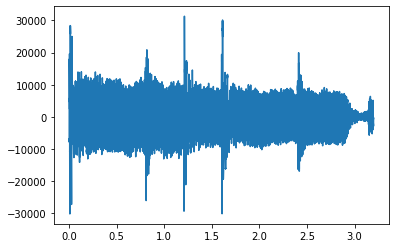

In [16]:
import glob
path = '/content/'
bars = glob.glob(path + '/*.wav')

f = wav2np(bars[0])
plt.plot(f[0],f[1])

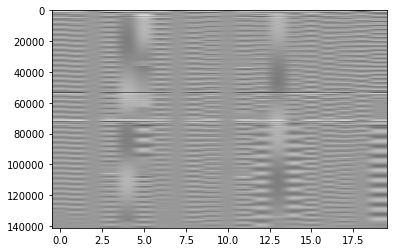

In [25]:
section = np.stack(wav2np(i)[1] for i in bars)
section.shape
plt.imshow(section.T,aspect='auto',cmap='Greys')

In [24]:
wav = wavio.read
start = int(wav.data.shape[0]/3)
end = int(wav.data.shape[0]/3)*2
plt.imshow(section.T[start:end],aspect='auto',cmap='Greys')

AttributeError: ignored

In [18]:
from IPython.core.pylabtools import figsize
seconds = 0.25
x = int(wav.rate*seconds)
start = int(wav.data.shape[0]/3)
end = int(wav.data.shape[0]/3)*2
plt.figure(figsize = (12,12))
plt.imshow(section.T[start:end],aspect='auto',cmap='Greys')

NameError: ignored